In [2]:
from bs4 import BeautifulSoup
import requests

url='https://apna.co/jobs/jobs-in-bengaluru?city_id=4&education_level=5&fall_back_type=location'

content=requests.get(url)
content=content.content
soup=BeautifulSoup(content,'html.parser')
temp=[]
joblis=[]

for i in range(110):
    url = f'https://apna.co/jobs?page={i}&city_id=4&education_level=5&fall_back_type=location'
    content = requests.get(url)
    content = content.content
    soup = BeautifulSoup(content, 'html.parser')
    d = soup.find_all(['div','a'], class_='JobCardList__Wrapper-sc-1v9ot9b-0 gzjzxw')
    for i in d:
        temp.append(i.getText().split('Years'))
for i in temp:
    for j in i:
        joblis.append(j.split('\xa0'))
from openpyxl.workbook import Workbook
wb=Workbook()
sheet=wb.active
sheet.title = 'apna.co'
header=['company_name','address',"package",'type','time','requireents','experience']
sheet.append(header)
for i in range(len(joblis)):
    try:
        sheet.append([joblis[i][0],joblis[i][1],joblis[i][2],joblis[i][3],joblis[i][4],joblis[i][5],joblis[i][6]])
    except Exception:pass
wb.save(filename = 'apna_co.xlsx')

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('apna_co.csv')
df=df.fillna(0)
df['package']=df['package'].apply(lambda x:x.split("-"))
df['min_salary']=df['package'].apply(lambda x:str(x[0])[1:])
df['max_salary']=df['package'].apply(lambda x:str(x[1])[2:])
df['experience_filter']=df['experience'].apply(lambda x: str(x).split('. '))
df['exp']=None
for i in range(len(df['experience_filter'])):
    try:
        df['exp'][i]=df['experience_filter'][i][1]
    except Exception:
        df['exp'][i]=0
df['exp']=df['exp'].apply(lambda x:str(x).split(' ')[0])
df['exp']=df['exp'].replace("Ltd.",0)
df['exp']=df['exp'].apply(lambda x: int(float(x)))
df['exp'].unique()

array([10,  2,  5,  0,  1,  6,  3], dtype=int64)

In [3]:
df['add']=df['address'].apply(lambda x:str(x).split(',')[0])

In [4]:
df.drop(['package', 'address','experience','experience_filter'], axis=1,inplace=True)
df

,company_name,type,time,requireents,min_salary,max_salary,exp,add
0,Chief Operating OfficerTechnospan Structures P...,Work from office,Full time,No test required,"75,000","1,49,999",10,Jakkur Layout
1,C/C++ Backend DeveloperAlgo Methods Software &...,Work from office,Full time,No test required,"30,000","1,49,999",2,BTM Layout
2,Data EngineerShrya Solutions,Work from office,Full time,No test required,"1,40,000","1,49,000",5,HSR Layout
3,Branch Sales ManagerIgnites Human Capital Serv...,Work from office,Night shift,No test required,"1,00,000","1,42,000",0,Bengaluru/Bangalore
4,PhysicianLopamudra Hospitals,Work from office,Full time,No test required,"50,000","1,49,000",1,Virajpet
...,...,...,...,...,...,...,...,...
308,Cafe ManagerConfused Genius,Work from office,Full time,No test required,"25,000","26,000",0,Sampangi Rama Nagar
309,Home TutorAHA Classes,Field job,Full time,No test required,"25,000","25,001",0,White Field
310,Digital Marketing SpecialistPromax Properties,Work from office,Full time,No test required,"20,000","75,000",0,Kothanur
311,E-Commerce ExecutiveJust Shopping,Work from office,Full time,No test required,"18,000","25,000",0,Lalbagh West Gate


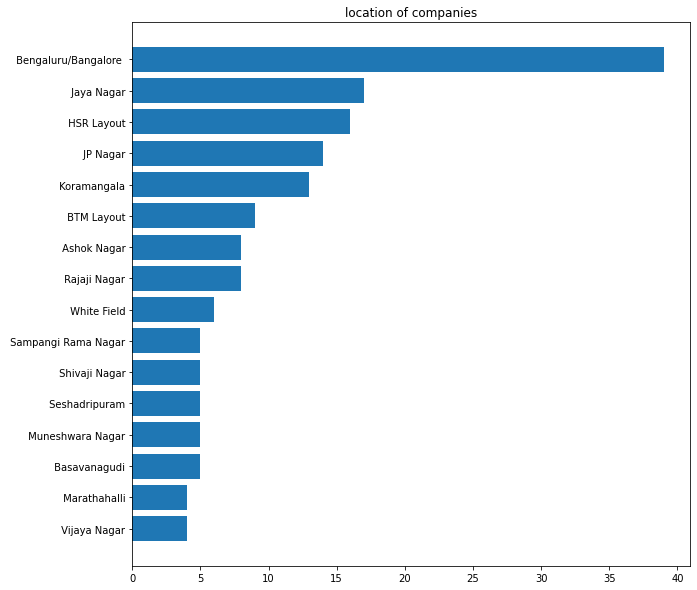

In [5]:
fig = plt.figure(figsize=(10,10))
plt.barh(df['add'].value_counts().index[15::-1],width=df['add'].value_counts().values[15::-1])
plt.title("location of companies")
plt.show()

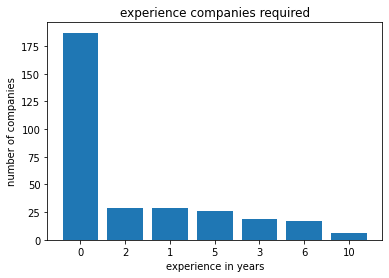

In [6]:
plt.bar(['0','2','1','5','3','6','10'],df['exp'].value_counts().values)
plt.title("experience companies required")
plt.xlabel("experience in years")
plt.ylabel("number of companies")
plt.show()


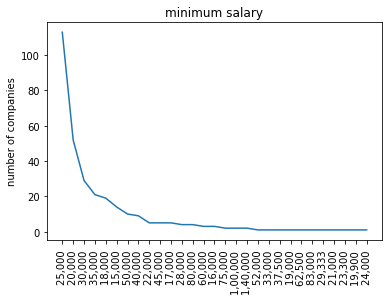

In [7]:
plt.plot(df['min_salary'].value_counts().index,df['min_salary'].value_counts().values)
plt.title("minimum salary")
plt.xticks(rotation=90)
plt.ylabel("number of companies")
plt.show()


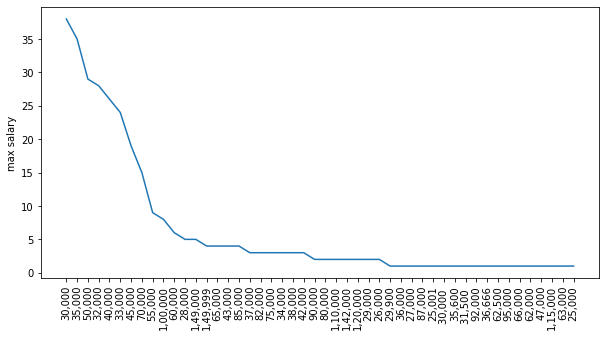

In [8]:
fig = plt.figure(figsize=(10,5))
plt.plot(df['max_salary'].value_counts().index,df['max_salary'].value_counts().values)
plt.xticks(rotation=90)
plt.ylabel("max salary")
plt.show()

<BarContainer object of 4 artists>

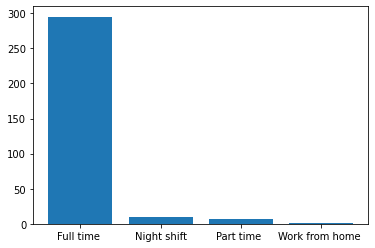

In [9]:
plt.bar(df['time'].value_counts().index,df['time'].value_counts().values)

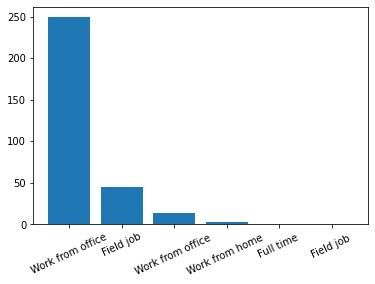

In [10]:
plt.bar(df['type'].value_counts().index,df['type'].value_counts().values)
plt.xticks(rotation=25)
plt.show()